<a href="https://colab.research.google.com/github/DragonZeroZzz/cifar-10-machine-learning/blob/main/css324f21_hw_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSS324 Homework Assignment

CIFAR10 is a small image classification dataset. Its objective is to classification an 32x32 color image into 10 classes.

See https://www.cs.toronto.edu/~kriz/cifar.html and https://keras.io/api/datasets/cifar10/ for more details.

by

Sorawit Chokphantavee 6222782227\
Sirawit Chokphantavee 6222782250

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

7


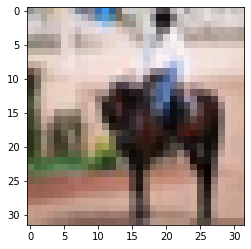

In [ ]:
# Plot a training example
x = x_train[11, :, :, :]
y = y_train[11][0]

plt.imshow(x)
print(y)        # 7 = horse

## Question 1

Construct a deep neural network containing three hidden layer to classify images in the CIFAR10 dataset. You can choose the numbers of hidden nodes in three layers, appropriate activation functions, regularizers. Use 20% of the training set to validate the model.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

In [ ]:
# Your implementation for Question 1
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR10 dataset
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocessing
y_train = tf.one_hot(y_train, 10)
y_train = tf.reshape(y_train,[-1,10])
y_test = tf.one_hot(y_test, 10)
y_test = tf.reshape(y_test,[-1,10])
x_train = x_train / 255.0
x_test = x_test / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512,activation='relu',
    kernel_regularizer = tf.keras.regularizers.l2(1e-4)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256,activation='relu',
    kernel_regularizer = tf.keras.regularizers.l2(1e-4)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(128,activation='relu',
    kernel_regularizer = tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', 
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
             filepath = '/content/checkpoint',
             save_weights_only = True,
             monitor = 'val_accuracy',
             mode = 'max',
             save_best_only = True
)

history = model.fit(x_train, y_train, epochs=200, batch_size=8192,
                    shuffle=True, validation_split=0.2, callbacks=[model_checkpoint_callback])


Epoch 1/200
5/5 [==============================] - 3s 269ms/step - loss: 3.0372 - accuracy: 0.1857 - val_loss: 2.7248 - val_accuracy: 0.1364
Epoch 2/200
5/5 [==============================] - 1s 136ms/step - loss: 2.5337 - accuracy: 0.2638 - val_loss: 4.6687 - val_accuracy: 0.1042
Epoch 3/200
5/5 [==============================] - 1s 135ms/step - loss: 2.3598 - accuracy: 0.2867 - val_loss: 3.7861 - val_accuracy: 0.1239
Epoch 4/200
5/5 [==============================] - 1s 153ms/step - loss: 2.2498 - accuracy: 0.3108 - val_loss: 3.1941 - val_accuracy: 0.1498
Epoch 5/200
5/5 [==============================] - 1s 160ms/step - loss: 2.1846 - accuracy: 0.3212 - val_loss: 2.7882 - val_accuracy: 0.1776
Epoch 6/200
5/5 [==============================] - 1s 153ms/step - loss: 2.1115 - accuracy: 0.3349 - val_loss: 2.5492 - val_accuracy: 0.2089
Epoch 7/200
5/5 [==============================] - 1s 157ms/step - loss: 2.0653 - accuracy: 0.3480 - val_loss: 2.3117 - val_accuracy: 0.2450
Epoch 8/200
5

Train set
accuracy = 0.8273800015449524
loss = 0.6948694586753845
Test set
accuracy = 0.571399986743927
loss = 1.4143136739730835
Validation
accuracy = 0.5856999754905701
loss = 1.3834102153778076



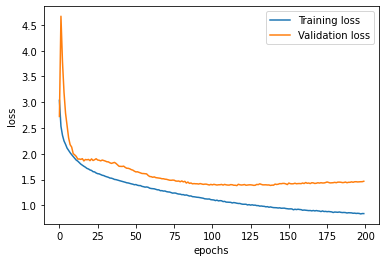

In [ ]:
# Plot the training loss and validation loss
model.load_weights('/content/checkpoint')
train_loss, train_acc = model.evaluate(x_train,y_train,verbose=0)
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=0)
val_acc = max(history.history['val_accuracy'])
val_loss = min(history.history['val_loss'])

print('Train set')
print('accuracy =',train_acc)
print('loss =',train_loss)
print('==================')
print('Test set')
print('accuracy =',test_acc)
print('loss =',test_loss)
print('==================')
print('Validation')
print('accuracy =',val_acc)
print('loss =',val_loss)
print('==================')
print()

loss_train = np.array(history.history['loss']) 
loss_test = np.array(history.history['val_loss'])

x = np.arange(0,loss_train.shape[0])
plt.plot(x, loss_train, label='Training loss')
plt.plot(x, loss_test, label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training loss','Validation loss'])
plt.show()

## Question 2

Construct a convolutional neural network using your own structure. Try to maximize the prediction accuracy of your model.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

In [ ]:
# Your implementation for Question 2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR10 dataset
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocessing
y_train = tf.one_hot(y_train, 10)
y_train = tf.reshape(y_train,[-1,10])
y_test = tf.one_hot(y_test, 10)
y_test = tf.reshape(y_test,[-1,10])
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((-1,32,32,3))
x_test = x_test.reshape((-1,32,32,3))

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(32,32,3)),
  tf.keras.layers.Conv2D(64,(3,3),padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D((3,3)),
  tf.keras.layers.SpatialDropout2D(0.2),
  tf.keras.layers.Conv2D(128,(3,3),padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D((3,3)),
   tf.keras.layers.SpatialDropout2D(0.3),
  tf.keras.layers.Conv2D(256,(3,3),padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D((3,3)),
  tf.keras.layers.SpatialDropout2D(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu',
    kernel_regularizer = tf.keras.regularizers.l2(1e-4)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256,activation='relu',
    kernel_regularizer = tf.keras.regularizers.l2(1e-4)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(128,activation='relu',
    kernel_regularizer = tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', 
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
             filepath = '/content/checkpoint2',
             save_weights_only = True,
             monitor = 'val_accuracy',
             mode = 'max',
             save_best_only = True
)

history = model.fit(x_train, y_train, epochs=200, batch_size=512,
                    shuffle=True, validation_split=0.2, callbacks=[model_checkpoint_callback2])


Epoch 1/200
79/79 [==============================] - 36s 81ms/step - loss: 2.6529 - accuracy: 0.1843 - val_loss: 3.0100 - val_accuracy: 0.0997
Epoch 2/200
79/79 [==============================] - 6s 72ms/step - loss: 2.0745 - accuracy: 0.2824 - val_loss: 3.5173 - val_accuracy: 0.0997
Epoch 3/200
79/79 [==============================] - 6s 72ms/step - loss: 1.8651 - accuracy: 0.3410 - val_loss: 3.5371 - val_accuracy: 0.1027
Epoch 4/200
79/79 [==============================] - 6s 71ms/step - loss: 1.7414 - accuracy: 0.3864 - val_loss: 3.4304 - val_accuracy: 0.0981
Epoch 5/200
79/79 [==============================] - 6s 72ms/step - loss: 1.6477 - accuracy: 0.4243 - val_loss: 2.9903 - val_accuracy: 0.1639
Epoch 6/200
79/79 [==============================] - 6s 73ms/step - loss: 1.5670 - accuracy: 0.4558 - val_loss: 2.4981 - val_accuracy: 0.2543
Epoch 7/200
79/79 [==============================] - 6s 73ms/step - loss: 1.5086 - accuracy: 0.4780 - val_loss: 1.7662 - val_accuracy: 0.4126
Epoch

Train set
accuracy = 0.954259991645813
loss = 0.21426187455654144
Test set
accuracy = 0.7972999811172485
loss = 0.6932368874549866
validation
accuracy = 0.8033999800682068
loss = 0.6635981202125549



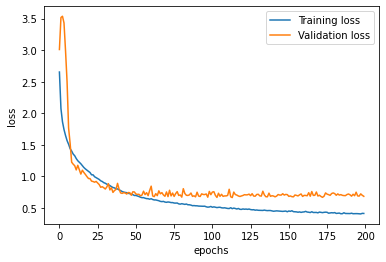

In [ ]:
# Plot the training loss and validation loss
model.load_weights('/content/checkpoint2')
train_loss, train_acc = model.evaluate(x_train,y_train,verbose=0)
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=0)
val_acc = max(history.history['val_accuracy'])
val_loss = min(history.history['val_loss'])

print('Train set')
print('accuracy =',train_acc)
print('loss =',train_loss)
print('==================')
print('Test set')
print('accuracy =',test_acc)
print('loss =',test_loss)
print('==================')
print('validation')
print('accuracy =',val_acc)
print('loss =',val_loss)
print('==================')
print()

loss_train = np.array(history.history['loss']) 
loss_test = np.array(history.history['val_loss'])

x = np.arange(0,loss_train.shape[0])
plt.plot(x, loss_train, label='Training loss')
plt.plot(x, loss_test, label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training loss','Validation loss'])
plt.show()